In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import linregress
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
import pandas as pd
import numpy as np
ride_file='./raw_data/ride_data.csv'
city_file = './raw_data/city_data.csv'


In [2]:
ride_df = pd.read_csv(ride_file)
city_df = pd.read_csv(city_file)
group_by_city = ride_df.groupby(['city'])
avg_df = pd.DataFrame(group_by_city.mean())
avg_df.rename(columns={"fare":"Average fare"})
avg_df["No. of rides"] = pd.DataFrame(group_by_city["fare"].count())
avg_df["Total Price"] = pd.DataFrame(group_by_city["fare"].sum())

In [3]:
city_df = city_df.sort_values(["city"], ascending=True)

In [4]:
avg_df
avg_df.reset_index(inplace=True)
# Merge two dataframes using an inner join
merge_table = pd.merge(avg_df, city_df, on="city")
total_earnings = merge_table["Total Price"].sum()
merge_table["Percentage Of earning"] = merge_table["Total Price"]*100/total_earnings
merge_table

,city,fare,ride_id,No. of rides,Total Price,driver_count,type,Percentage Of earning
0,Alvarezhaven,23.928710,5.351586e+12,31,741.79,21,Urban,1.147054
1,Alyssaberg,20.609615,3.536678e+12,26,535.85,67,Urban,0.828603
2,Anitamouth,37.315556,4.195870e+12,9,335.84,16,Suburban,0.519321
3,Antoniomouth,23.625000,5.086800e+12,22,519.75,21,Urban,0.803707
4,Aprilchester,21.981579,4.574788e+12,19,417.65,49,Urban,0.645826
5,Arnoldview,25.106452,5.021952e+12,31,778.30,41,Urban,1.203511
6,Campbellport,33.711333,5.805424e+12,15,505.67,26,Suburban,0.781934
7,Carrollbury,36.606000,4.274615e+12,10,366.06,4,Suburban,0.566051
8,Carrollfort,25.395517,4.759008e+12,29,736.47,55,Urban,1.138828
9,Clarkstad,31.051667,6.682745e+12,12,372.62,21,Suburban,0.576195


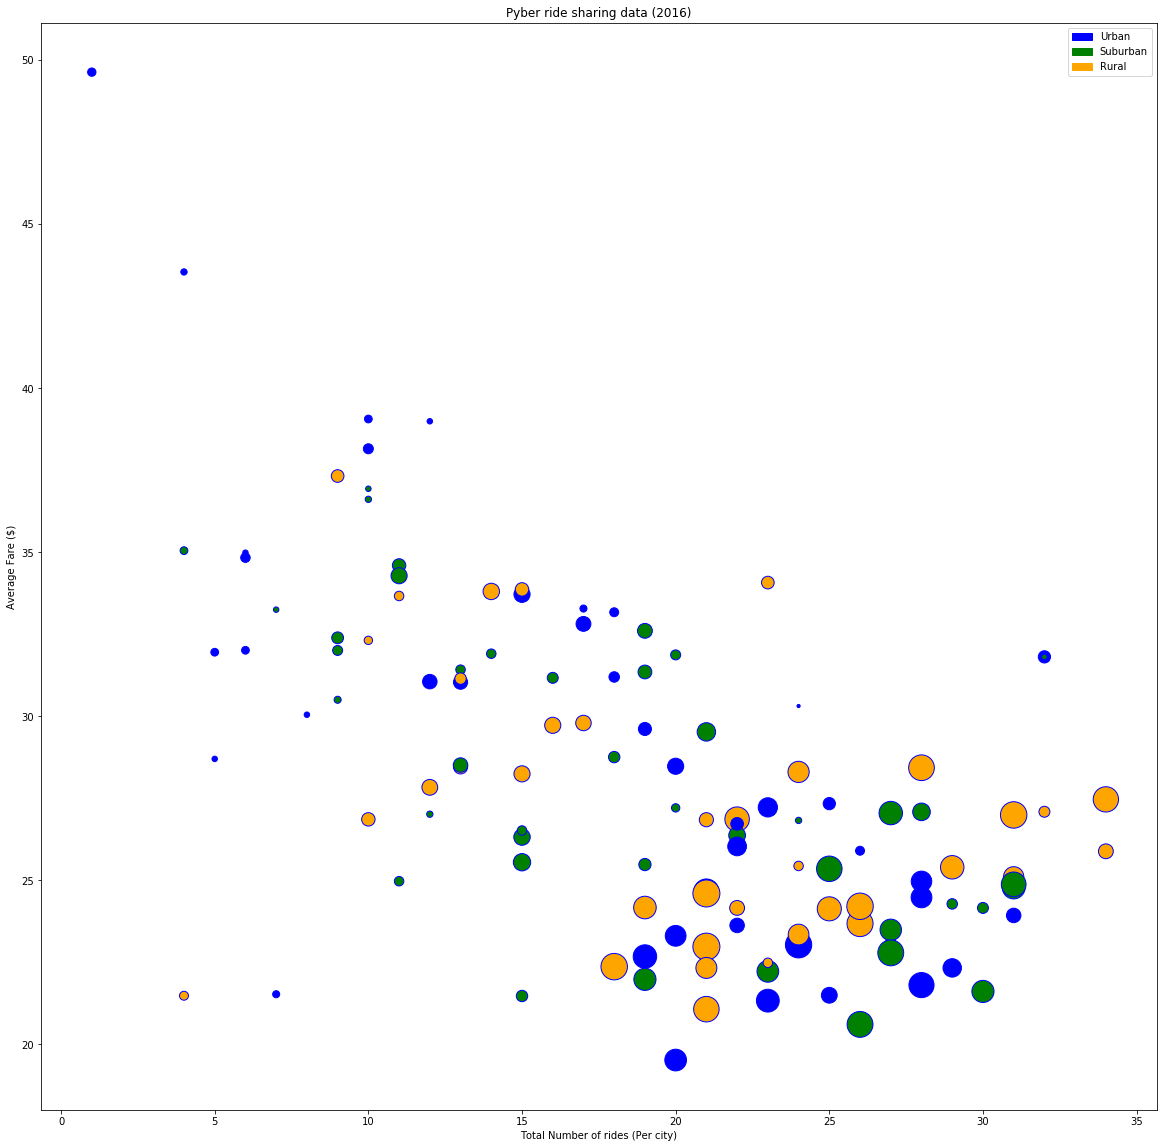

In [5]:
color = ['blue','green','orange']
# making the scatter plot
plt.scatter(merge_table["No. of rides"], merge_table["fare"], c=color, s=merge_table["driver_count"]*10, linewidths=1
                        , edgecolor='b')
# y label
plt.ylabel('Average Fare ($)')
# x label
plt.xlabel('Total Number of rides (Per city)')
#title
plt.title("Pyber ride sharing data (2016)")
# and a legend
# Plot legend.
plt.legend(loc="upper right", )
# Plot legend.
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=10)
blue_patch = mpatches.Patch(color='blue', label='Urban')
green_patch = mpatches.Patch(color='green', label='Suburban')
orange_patch = mpatches.Patch(color='orange', label='Rural')
plt.legend(handles=[blue_patch,green_patch,orange_patch])
plt.show()


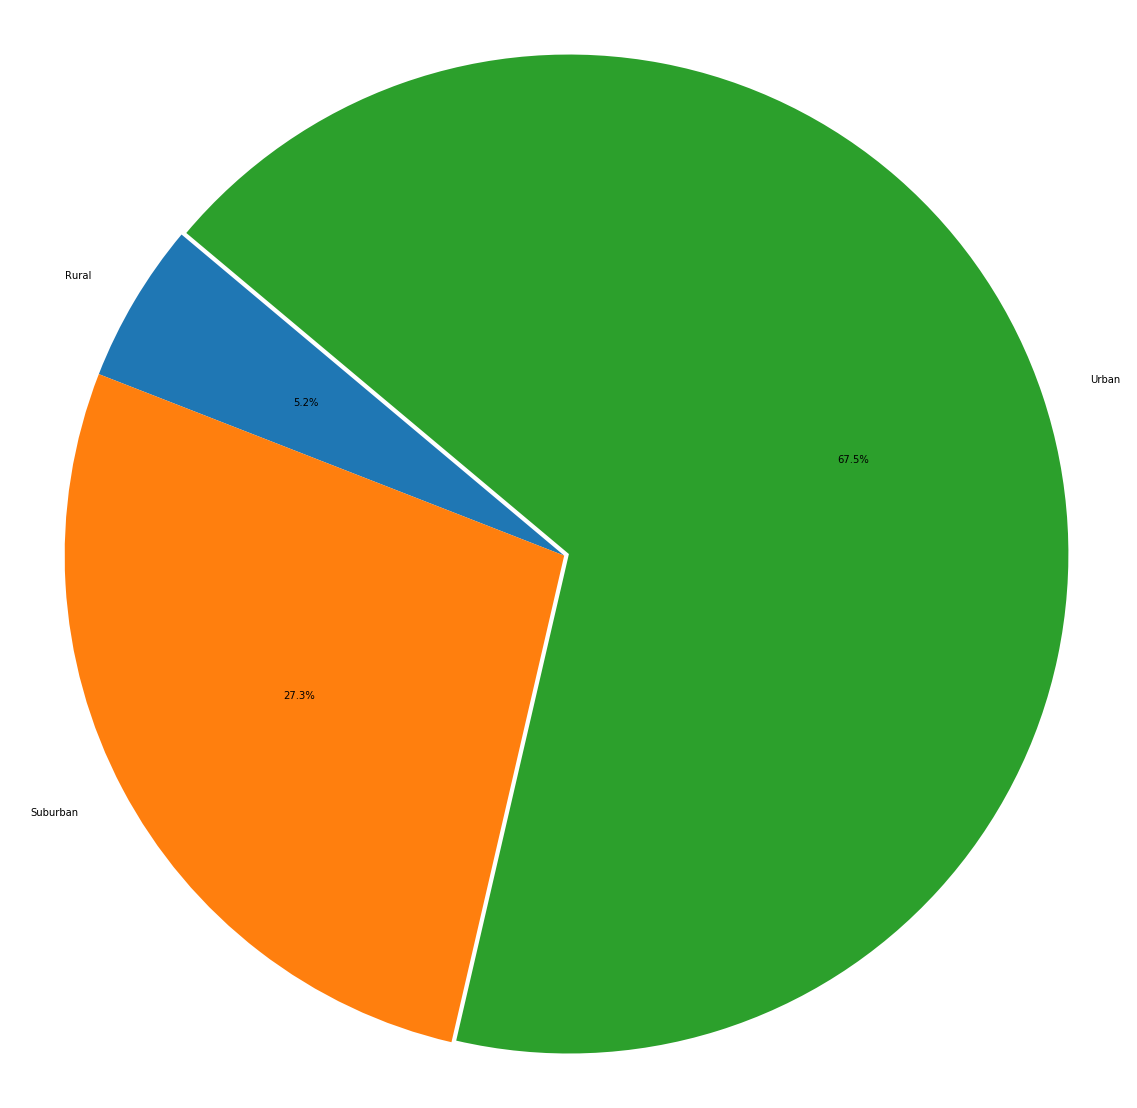

In [72]:

group_by_type = city_df.groupby(['type'])
avg_df_type = pd.DataFrame(group_by_type.mean())

final_df = pd.DataFrame(merge_table)
group_by_type=final_df.groupby(["type"])
final_df_type=pd.DataFrame(group_by_type.mean())
final_df_type["Total No. of rides"] = pd.DataFrame(group_by_type["No. of rides"].sum())
final_df_type["Total Price"] = pd.DataFrame(group_by_type["Total Price"].sum())
final_df_type["Total No. of drivers"] =  pd.DataFrame(group_by_type["driver_count"].sum())
total_price_of_all = final_df_type["Total Price"].sum()
total_no_of_rides =  final_df_type["Total No. of rides"].sum()
total_no_of_drivers = final_df_type["Total No. of drivers"].sum()
final_df_type["Percentage of price"] = final_df_type["Total Price"]*100/total_price_of_all
final_df_type["Percentage of rides"] = final_df_type["Total No. of rides"]*100/total_no_of_rides
final_df_type["Percentage of drivers"] = final_df_type["Total No. of drivers"]*100/total_no_of_drivers
final_df_type.reset_index(inplace=True)
# PLotting the charts now
# The values of each section of the pie chart
sizes_price = final_df_type["Percentage of price"]
sizes_rides = final_df_type["Percentage of rides"]
sizes_drivers = final_df_type["Percentage of drivers"]
labels=final_df_type["type"]
explode = (0.0, 0.0, 0.01)
plt.pie(sizes_rides, labels=labels, explode=explode,
        autopct="%1.1f%%", shadow=False, startangle=140)

plt.axis("equal")
plt.savefig('ShareByRides')
plt.show()